In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.append('../src')
import utils as ut
# Load the dataset
file_path = '../data/Raw/Dataset.csv'  # Replace with your actual file path
df = ut.load_dataset(file_path)
df = ut.fixed_columns(df)
df.head()  # Display the first few rows of the dataset

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Total,Area,KG
0,1,48000,156640,9872,47372,25538,9050,296472,ampara,4971
1,1,44000,158900,9932,47600,21638,9950,292020,bakamuna,2313
2,1,46000,157250,9870,49902,23638,9050,295710,dehiaththakandiya,1793
3,1,47000,130200,11630,48030,24600,11000,272460,girithale,4600
4,1,49200,145806,8950,49560,27650,9530,290696,Kandakatiya,1238


In [3]:
df.info()  # Overview of columns and data types
df.describe()  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Acre               1200 non-null   int64 
 1   Land_Planting      1200 non-null   int64 
 2   Strate_Fertilizer  1200 non-null   int64 
 3   Liquid_Fertilizer  1200 non-null   int64 
 4   Fungicide          1200 non-null   int64 
 5   Insecticide        1200 non-null   int64 
 6   Others             1200 non-null   int64 
 7   Total              1200 non-null   int64 
 8   Area               1200 non-null   object
 9   KG                 1200 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 93.9+ KB


,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Total,KG
count,1200.0000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000
mean,2.5000,115591.007500,374449.760000,28800.494167,123172.231667,61388.832500,27832.397500,7.312347e+05,7812.212500
std,1.1185,50019.784036,170506.153441,14314.306914,53683.578789,28094.136038,12790.406832,3.244336e+05,5327.835472
min,1.0000,41006.000000,128786.000000,7101.000000,45896.000000,20028.000000,6857.000000,2.652530e+05,205.000000
25%,1.7500,72768.750000,217968.250000,15050.750000,68110.500000,35802.250000,15468.250000,4.704450e+05,3571.500000
50%,2.5000,120515.500000,382971.500000,27913.000000,131920.500000,60078.500000,28723.500000,7.455495e+05,6392.000000
75%,3.2500,154731.500000,512385.750000,39489.500000,160686.500000,84327.000000,38059.000000,9.805105e+05,10340.000000
max,4.0000,199723.000000,678839.000000,59905.000000,203768.000000,115934.000000,51942.000000,1.263818e+06,29580.000000


In [4]:
# drop current Total column
df.drop('Total', axis=1, inplace=True)
df.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG
0,1,48000,156640,9872,47372,25538,9050,ampara,4971
1,1,44000,158900,9932,47600,21638,9950,bakamuna,2313
2,1,46000,157250,9870,49902,23638,9050,dehiaththakandiya,1793
3,1,47000,130200,11630,48030,24600,11000,girithale,4600
4,1,49200,145806,8950,49560,27650,9530,Kandakatiya,1238


In [5]:
new_df = ut.calculate_total_expenses(df)
new_df.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses
0,1,48000,156640,9872,47372,25538,9050,ampara,4971,296472
1,1,44000,158900,9932,47600,21638,9950,bakamuna,2313,292020
2,1,46000,157250,9870,49902,23638,9050,dehiaththakandiya,1793,295710
3,1,47000,130200,11630,48030,24600,11000,girithale,4600,272460
4,1,49200,145806,8950,49560,27650,9530,Kandakatiya,1238,290696


In [6]:
new_df.isnull().sum()  # Check for missing values
# Example: df.fillna(0, inplace=True)  # Fill missing values with 0

Acre                 0
Land_Planting        0
Strate_Fertilizer    0
Liquid_Fertilizer    0
Fungicide            0
Insecticide          0
Others               0
Area                 0
KG                   0
Total_Expenses       0
dtype: int64

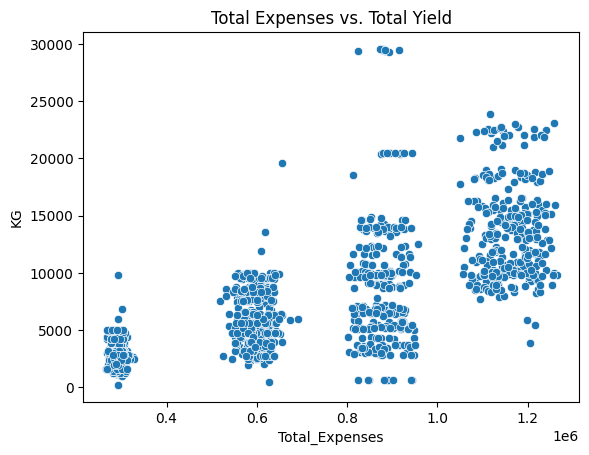

In [7]:
sns.scatterplot(x='Total_Expenses', y='KG', data=new_df)
plt.title('Total Expenses vs. Total Yield')
plt.show()

In [8]:
df_ampara = ut.filter_by_area(new_df, 'ampara')
df_ampara.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses
0,1,48000,156640,9872,47372,25538,9050,ampara,4971,296472
14,1,44260,147717,11375,49765,28335,10247,ampara,4650,291699
18,1,49250,142663,9160,50052,24220,6857,ampara,3013,282202
19,1,50800,167441,8912,47742,22592,8797,ampara,3886,306284
21,1,45000,154507,13152,49302,29541,10674,ampara,2313,302176


In [9]:
df_ampara.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses
0,1,48000,156640,9872,47372,25538,9050,ampara,4971,296472
14,1,44260,147717,11375,49765,28335,10247,ampara,4650,291699
18,1,49250,142663,9160,50052,24220,6857,ampara,3013,282202
19,1,50800,167441,8912,47742,22592,8797,ampara,3886,306284
21,1,45000,154507,13152,49302,29541,10674,ampara,2313,302176


In [10]:
investment_value = 50000  # Example investment value
price_per_kg = 100  # Example price per KG you can earn
initial_cost = 10000  # Example initial cost

df_analysis = ut.calculate_yield_and_profitability(investment_value, new_df, price_per_kg, initial_cost)
df_analysis.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses,Investment,Estimated_Yield,Revenue,Profit,Is_Profitable
0,1,48000,156640,9872,47372,25538,9050,ampara,4971,296472,60000,838.359103,83835.910305,23835.910305,True
1,1,44000,158900,9932,47600,21638,9950,bakamuna,2313,292020,60000,396.034518,39603.451818,-20396.548182,False
2,1,46000,157250,9870,49902,23638,9050,dehiaththakandiya,1793,295710,60000,303.168645,30316.864496,-29683.135504,False
3,1,47000,130200,11630,48030,24600,11000,girithale,4600,272460,60000,844.160611,84416.061073,24416.061073,True
4,1,49200,145806,8950,49560,27650,9530,Kandakatiya,1238,290696,60000,212.937227,21293.722652,-38706.277348,False


In [11]:
summary = ut.summarize_investment_analysis(df_analysis)
summary

,Area,Profit,Is_Profitable,Estimated_Yield
0,Kandakatiya,-6647.784964,0.172414,533.522150
1,ampara,-3230.098338,0.474903,567.699017
2,anganaya,-39631.369853,0.000000,203.686301
3,bakamuna,-16374.372566,0.049180,436.256274
4,dehiaththakandiya,-9583.064717,0.155738,504.169353
5,girithale,-9256.481677,0.315217,507.435183
6,kanthale,-10057.515002,0.340741,499.424850
7,mahiyanganaya,-15613.565849,0.222222,443.864342
8,medirigiriya,9828.144917,0.614035,698.281449
9,monagala,-19581.789855,0.135135,404.182101


# You can try deferent investments, initial costs to see how it proftable or not to invest in a certain area.

In [12]:
# Save the dataset
file_path = '../data/Processed/Data(1).csv'
df_analysis.to_csv(file_path, index=False)

In [13]:
# Model Evaluation
model_df = new_df.copy()
model_df.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses,Investment,Estimated_Yield,Revenue,Profit,Is_Profitable
0,1,48000,156640,9872,47372,25538,9050,ampara,4971,296472,60000,838.359103,83835.910305,23835.910305,True
1,1,44000,158900,9932,47600,21638,9950,bakamuna,2313,292020,60000,396.034518,39603.451818,-20396.548182,False
2,1,46000,157250,9870,49902,23638,9050,dehiaththakandiya,1793,295710,60000,303.168645,30316.864496,-29683.135504,False
3,1,47000,130200,11630,48030,24600,11000,girithale,4600,272460,60000,844.160611,84416.061073,24416.061073,True
4,1,49200,145806,8950,49560,27650,9530,Kandakatiya,1238,290696,60000,212.937227,21293.722652,-38706.277348,False


In [14]:
model_df.isnull().sum()  # Check for missing values


Acre                 0
Land_Planting        0
Strate_Fertilizer    0
Liquid_Fertilizer    0
Fungicide            0
Insecticide          0
Others               0
Area                 0
KG                   0
Total_Expenses       0
Investment           0
Estimated_Yield      0
Revenue              0
Profit               0
Is_Profitable        0
dtype: int64

In [15]:
# Feature Engineering
model_df['Cost_Per_Acre'] = model_df['Total_Expenses'] / model_df['Acre']  # Example feature: cost per acre
model_df['Yield_Per_Acre'] = model_df['KG'] / model_df['Acre']  # Yield per acre

In [16]:
model_df.tail(50)

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses,Investment,Estimated_Yield,Revenue,Profit,Is_Profitable,Cost_Per_Acre,Yield_Per_Acre
1150,4,171147,664593,32894,198937,91086,40040,mahiyanganaya,11280,1198697,60000,470.510896,47051.089642,-12948.910358,False,299674.25,2820.0
1151,4,166196,569476,47627,187993,105159,45085,bakamuna,11850,1121536,60000,528.293341,52829.334056,-7170.665944,False,280384.00,2962.5
1152,4,173903,589015,34782,199428,86094,40085,girithale,8950,1123307,60000,398.377291,39837.729134,-20162.270866,False,280826.75,2237.5
1153,4,195477,667300,43723,202104,80748,43037,Kandakatiya,9700,1232389,60000,393.544571,39354.457075,-20645.542925,False,308097.25,2425.0
1154,4,176433,583956,56311,202947,96960,42085,medirigiriya,22050,1158692,60000,951.503937,95150.393720,35150.393720,True,289673.00,5512.5
1155,4,185812,622983,51921,196026,89181,36744,monaragala,9900,1182667,60000,418.545542,41854.554156,-18145.445844,False,295666.75,2475.0
1156,4,176940,661718,38899,192919,97721,41887,morawewa,18320,1210084,60000,756.972243,75697.224325,15697.224325,True,302521.00,4580.0
1157,4,176396,638480,43940,189453,93826,42417,nikaweratiya,15080,1184512,60000,636.549060,63654.905987,3654.905987,True,296128.00,3770.0
1158,4,193626,655831,58113,194327,82411,38850,kanthale,14150,1223158,60000,578.420776,57842.077638,-2157.922362,False,305789.50,3537.5
1159,4,195141,667371,51029,194246,108341,44465,ampara,15890,1260593,60000,630.258934,63025.893369,3025.893369,True,315148.25,3972.5


In [17]:
# save the dataset
file_path = '../data/Processed/Data_for_model.csv'
ut.save_dataset(model_df, file_path)

Dataset saved to ../data/Processed/Data_for_model.csv


In [18]:
model_df.columns

Index(['Acre', 'Land_Planting', 'Strate_Fertilizer', 'Liquid_Fertilizer',
       'Fungicide', 'Insecticide', 'Others', 'Area', 'KG', 'Total_Expenses',
       'Investment', 'Estimated_Yield', 'Revenue', 'Profit', 'Is_Profitable',
       'Cost_Per_Acre', 'Yield_Per_Acre'],
      dtype='object')

In [19]:
# Encoding Categorical Variables
# Evaluate encoding techniques
target = 'Profit'  # Assuming you want to predict profit
categorical_column = 'Area'

scores = ut.evaluate_encoding_techniques(df, target, categorical_column)

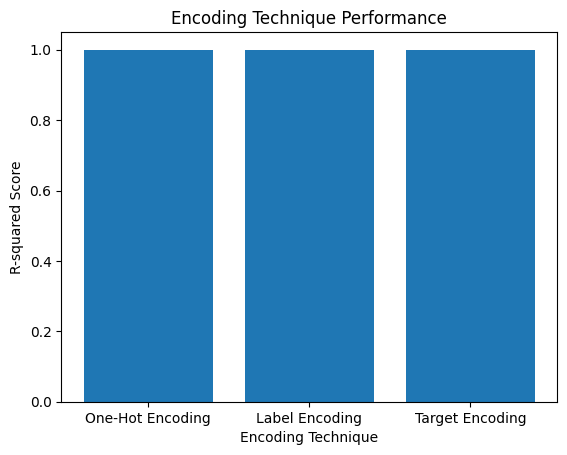

In [20]:
# Plot the performance of different encoding techniques
ut.plot_encoding_performance(scores)

In [21]:
# Print the best encoding technique
best_encoding = ut.get_best_encoding_technique(scores)

Best encoding technique: One-Hot Encoding with R-squared score: 1.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select the best encoding technique
if best_encoding == 'One-Hot Encoding':
    df_encoded = ut.one_hot_encode(df, categorical_column)
elif best_encoding == 'Label Encoding':
    df_encoded = ut.label_encode(df, categorical_column)
elif best_encoding == 'Target Encoding':
    df_encoded = ut.target_encode(df, categorical_column, target)
else:
    raise ValueError("Invalid encoding technique")

# Prepare data for training
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model = ut.train_and_save_model(model, X_train, y_train)

# Evaluate the model
metrics = ut.evaluate_model(model, X_test, y_test)
print("Model Evaluation Metrics:", metrics)

Model Evaluation Metrics: {'MAE': np.float64(2.952826131756107e-10), 'MSE': np.float64(1.129077272170248e-19), 'R-squared': 1.0}


he model evaluation metrics you've provided are:

MAE (Mean Absolute Error): 
np.float64
(
2.952826131756107
×
1
0
−
10
)
np.float64(2.952826131756107×10 
−10
 )
MSE (Mean Squared Error): 
np.float64
(
1.129077272170248
×
1
0
−
19
)
np.float64(1.129077272170248×10 
−19
 )
R-squared: 
1.0
1.0
Here's a detailed explanation of each metric:

1. Mean Absolute Error (MAE)
Value: 
2.95
×
1
0
−
10
2.95×10 
−10
 
Interpretation: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
Implication: A very low MAE indicates that the model's predictions are very close to the actual values. In this case, the MAE is extremely close to zero, suggesting the model's predictions are highly accurate.
2. Mean Squared Error (MSE)
Value: 
1.13
×
1
0
−
19
1.13×10 
−19
 
Interpretation: MSE measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value. It penalizes larger errors more than MAE because it squares the error.
Implication: A very low MSE, especially one as close to zero as 
1.13
×
1
0
−
19
1.13×10 
−19
 , indicates that the model's predictions are almost perfect with respect to the squared error. This is another strong indication of model accuracy.
3. R-squared
Value: 
1.0
1.0
Interpretation: R-squared, also known as the coefficient of determination, indicates how well the model explains the variability of the response data around its mean. An R-squared of 1.0 means that the model explains all the variability in the target variable.
Implication: An R-squared of 1.0 is the best possible value, indicating that the model has perfectly fit the training data with no errors in prediction.
Summary
These metrics collectively suggest that your model is performing extremely well, with near-zero errors in predictions and a perfect fit to the data. However, keep in mind:

Overfitting: If these results are obtained on the training data, the model might be overfitting. It's crucial to evaluate the model on a separate test set to ensure it generalizes well to unseen data.
Realistic Performance: Sometimes, extremely low errors and perfect R-squared values may be due to data leakage or other issues. Always validate performance using cross-validation or on a separate test set to confirm the model's generalizability.
If you need to ensure that the model's performance is robust, consider evaluating it on a separate validation or test set and checking for overfitting signs.

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'R-squared': r2_score(y_test, y_pred)
}

print("Model Evaluation Metrics:", metrics)

Model Evaluation Metrics: {'MAE': np.float64(2.952826131756107e-10), 'MSE': np.float64(1.129077272170248e-19), 'R-squared': 1.0}


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared Score: {cv_scores.mean()}")

Cross-Validation R-squared Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation R-squared Score: 1.0


In [26]:
# save the model
model_path = '../models/'
import joblib

joblib.dump(model, model_path + 'trained_model.pkl')
print("Model saved to 'trained_model.pkl'")

Model saved to 'trained_model.pkl'


In [27]:
# load the model
loaded_model = ut.load_model(model_path + 'trained_model.pkl')

In [28]:
predictions = loaded_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics = {
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'R-squared': r2_score(y_test, predictions)
}

print("Model Evaluation Metrics:", metrics)

Model Evaluation Metrics: {'MAE': np.float64(2.952826131756107e-10), 'MSE': np.float64(1.129077272170248e-19), 'R-squared': 1.0}


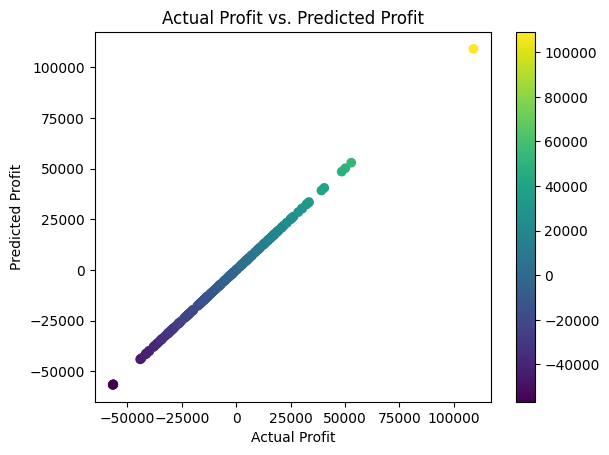

In [30]:
# Plot the predictions with color based on the actual profit values
plt.scatter(y_test, predictions, c=y_test, cmap='viridis')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs. Predicted Profit')
plt.colorbar()
plt.show()

In [31]:
def load_dataset(filepath):
    """
    Load a dataset from a CSV file.
    
    :param filepath: str, path to the dataset file
    :return: pd.DataFrame, loaded dataset
    """
    return pd.read_csv(filepath)

# Load dataset
df = load_dataset('../data/Processed/Data_for_model.csv')

In [32]:
df.head()

,Acre,Land_Planting,Strate_Fertilizer,Liquid_Fertilizer,Fungicide,Insecticide,Others,Area,KG,Total_Expenses,Investment,Estimated_Yield,Revenue,Profit,Is_Profitable,Cost_Per_Acre,Yield_Per_Acre
0,1,48000,156640,9872,47372,25538,9050,ampara,4971,296472,60000,838.359103,83835.910305,23835.910305,True,296472.0,4971.0
1,1,44000,158900,9932,47600,21638,9950,bakamuna,2313,292020,60000,396.034518,39603.451818,-20396.548182,False,292020.0,2313.0
2,1,46000,157250,9870,49902,23638,9050,dehiaththakandiya,1793,295710,60000,303.168645,30316.864496,-29683.135504,False,295710.0,1793.0
3,1,47000,130200,11630,48030,24600,11000,girithale,4600,272460,60000,844.160611,84416.061073,24416.061073,True,272460.0,4600.0
4,1,49200,145806,8950,49560,27650,9530,Kandakatiya,1238,290696,60000,212.937227,21293.722652,-38706.277348,False,290696.0,1238.0


In [33]:
# Encode categorical variables
def preprocess_data(df):
    """
    Preprocess the data for classification.
    
    :param df: pd.DataFrame, input dataset
    :return: pd.DataFrame, preprocessed dataset
    """
    df = df.copy()
    df['Is_Profitable'] = df['Profit'] > 0
    df = df.drop(columns=['Profit'])  # Drop target column as it's used for encoding

    # One-Hot Encoding for categorical columns
    df = pd.get_dummies(df, columns=['Area'], drop_first=True)
    
    return df

# Preprocess the data
df = preprocess_data(df)

# Define features and target
X = df.drop(columns=['Is_Profitable'])
y = df['Is_Profitable']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'classification_model.pkl')

['classification_model.pkl']

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[147   0]
 [  0  93]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       147
        True       1.00      1.00      1.00        93

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [37]:
# Load the trained model
loaded_model = joblib.load('classification_model.pkl')

# Example new data for prediction
def prepare_new_data(df, columns):
    """
    Prepare new data for prediction by ensuring it has the same columns and order as the training data.
    
    :param df: pandas DataFrame, new data for prediction
    :param columns: list of str, column names used during model training
    :return: pandas DataFrame, prepared new data
    """
    # Create a DataFrame with the same columns as the training data
    new_data = pd.DataFrame(columns=columns)
    
    # Fill in the new data
    for column in columns:
        if column in df.columns:
            new_data[column] = df[column]
        else:
            new_data[column] = 0  # Fill missing columns with 0 or another placeholder value
    
    return new_data

# Columns used during model training
training_columns = X.columns.tolist()

# Example new data
new_data = pd.DataFrame({
    'Land_Planting': [100000],
    'Strate_Fertilizer': [50000],
    'Liquid_Fertilizer': [30000],
    'Fungicide': [10000],
    'Insecticide': [15000],
    'Others': [20000],
    'Area_mahiyanganaya': [1],
    'Area_bakamuna': [0],
    'Area_girithale': [0],
    # Add other one-hot encoded columns as needed
})

# Prepare new data for prediction
prepared_new_data = prepare_new_data(new_data, training_columns)

# Predict profitability
profitability_prediction = loaded_model.predict(prepared_new_data)
print(f"Predicted profitability: {'Profit' if profitability_prediction[0] else 'Loss'}")


Predicted profitability: Loss
